# 분류
- 26일 수업 : 회귀(Regression)
  + 수치 예측
  + 평가지표 : RMSLE (점수가 낮게 나올수록 좋은 모델)
- 27일 수업 : 분류(Classification)
  + 범주 예측 (이진 분류 vs 다중 분류)
    - 이진 분류 : 남과 여 / 대출연체여부
    - 다중 분류 : 등급 분류 / 이미지와 품종 분류 등

In [35]:
# 붓꽃 분류
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 독립변수 2개 타겟은 1개
# X.shape, y.shape
# 다중 분류
# 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
print(np.unique(y))

[0 1 2]


- 26일 코드 X_val
  + 모델 한번에 결정 안함 (검정 필요, 실험)
  + 테스트 데이터가 확보가 된 상태
- 27일 코드 X_test
  + 테스트 데이터가 없음, 그래서 임의로 생성
  + 모델 검증 안함, 바로 사용하겠다는 의미

In [36]:
# 데이터를 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

# X : 특성(feature) 데이터 y : 레리블(Label) 데이터, Target
# test_size=0.3: 테스트 세트 비율 30%
# random_state=1: 재현 가능성을 위한 랜덤 시드
# stratify=y: 계층적 샘플링으로 클래스 비율 유지(층화 추출)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [37]:
# 전체 데이터셋의 클래스별 샘플 개수 출력
print('y의 레이블 카운트:', np.bincount(y))
# 훈련 데이터셋의 클래스별 샘플 개수 출력
print('y_train의 레이블 카운트:', np.bincount(y_train))
# 테스트 데이터셋의 클래스별 샘플 개수 출력
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


- 특성 표준화

In [38]:
# 모든 수치 데이터를 표준화 평균 0, 표준편차 1로 만들겠음
# 단위가 서로 다를 때 함
# linear_model 활용 시 필수
# 결정트리와 같은 비선형 모델은 특성표준화 할 필요가 없음
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # 인스턴스 생성
sc.fit(X_train)

# 훈련 데이터와 테스트 데이터를 표준화
# 테스트 데이터는 미지의 데이터 (전체 모수를 모르는 데이터)
# 연구자가 아는 건 훈련 데이터만 파악된 상태
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
"""sc = StandardScaler() # 인스턴스 생성

sc.fit(X_train)
X_train_std = sc.transform(X_train)

sc.fit(X_test) # 나는 미래의 데이터도 이미 다 알고있다는 의미
X_test_std = sc.transform(X_test)

# 위 코드로 진행시 과대적합(Overfitting) 문제 발생
# Data Leakage 용어
"""

'sc = StandardScaler() # 인스턴스 생성\n\nsc.fit(X_train)\nX_train_std = sc.transform(X_train)\n\nsc.fit(X_test) # 나는 미래의 데이터도 이미 다 알고있다는 의미\nX_test_std = sc.transform(X_test)\n\n# 위 코드로 진행시 과대적합(Overfitting) 문제 발생\n# Data Leakage 용어\n'

In [40]:
# 모델 만들기
from sklearn.linear_model import Perceptron

# eta0=0.1학습률 설정, 하이퍼파라미터 튜닝
# 퍼셉트론 : 딥러닝 모델의 초창기 모델(1950년대)
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [41]:
# 테스트 데이터에 대한 예측 수행
y_pred = ppn.predict(X_test_std)

# 실제 레이블과 예측값이 다른 샘플의 개수 출력
# 1개가 다름
(y_test != y_pred).sum()

np.int64(1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [45]:
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd 
import matplotlib.pyplot as plt

# 분류모델 만들기
tips = sns.load_dataset("tips")
tips.head()

# size 범주를 예측하는 모델을 만듭니다. 
# 가이드
# 문자열 데이터가 많음 ==> 인코딩 변환
# 수치 데이터는 ==> 표준화 
# 훈련 데이터 / 테스트 데이터 분리
tips['size'].unique() # 다중분류
tips['size'].value_counts() # 다중분류

# 특성 정의
numeric_features = ['total_bill', 'tip']
categorical_features = ['sex', 'smoker', 'day', 'time']

X = tips[numeric_features + categorical_features]
y = tips['size']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 데이터 전처리
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# 범주형 데이터 One-Hot 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# 특성 결합
X_train_processed = np.hstack([X_train_numeric, X_train_categorical])
X_test_processed = np.hstack([X_test_numeric, X_test_categorical])

# Perceptron 모델 학습
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_processed, y_train)

# 예측 및 평가
y_pred = perceptron.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# One-Hot 인코딩된 특성 이름 출력
feature_names = numeric_features.copy()
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i]
    feature_names.extend([f"{feature}_{cat}" for cat in categories])

print("\nFeature names after preprocessing:")
print(feature_names)

# 새로운 데이터 예측
print("\n새로운 데이터 예측:")
new_data = pd.DataFrame({
    'total_bill': [20.0],
    'tip': [4.0],
    'sex': ['Male'],
    'smoker': ['No'],
    'day': ['Sun'],
    'time': ['Dinner']
})

# 새로운 데이터 전처리
new_numeric = scaler.transform(new_data[numeric_features])
new_categorical = encoder.transform(new_data[categorical_features])
new_processed = np.hstack([new_numeric, new_categorical])

# 예측 수행
prediction = perceptron.predict(new_processed)
print("입력 데이터:")
print(new_data)
print("\n예측된 size:", prediction[0])

Accuracy: 0.612

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.68      0.93      0.79        30
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.61        49
   macro avg       0.16      0.20      0.17        49
weighted avg       0.46      0.61      0.52        49


Feature names after preprocessing:
['total_bill', 'tip', 'sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch']

새로운 데이터 예측:
입력 데이터:
   total_bill  tip   sex smoker  day    time
0        20.0  4.0  Male     No  Sun  Dinner

예측된 size: 3


C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

# RandomForest
- Perceptron 모델 : 1950년대 
- RandomForest 모델 : 2001년 즈음
- 머신러닝 & 딥러닝의 기본적인 원리 : 실험 (다양한 알고리즘 반복)
  + 실험이 정상적으로 잘 진행할 수 있도록 Layout 설계 

Accuracy: 0.531

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.69      0.80      0.74        30
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.53        49
   macro avg       0.16      0.18      0.16        49
weighted avg       0.46      0.53      0.49        49



C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

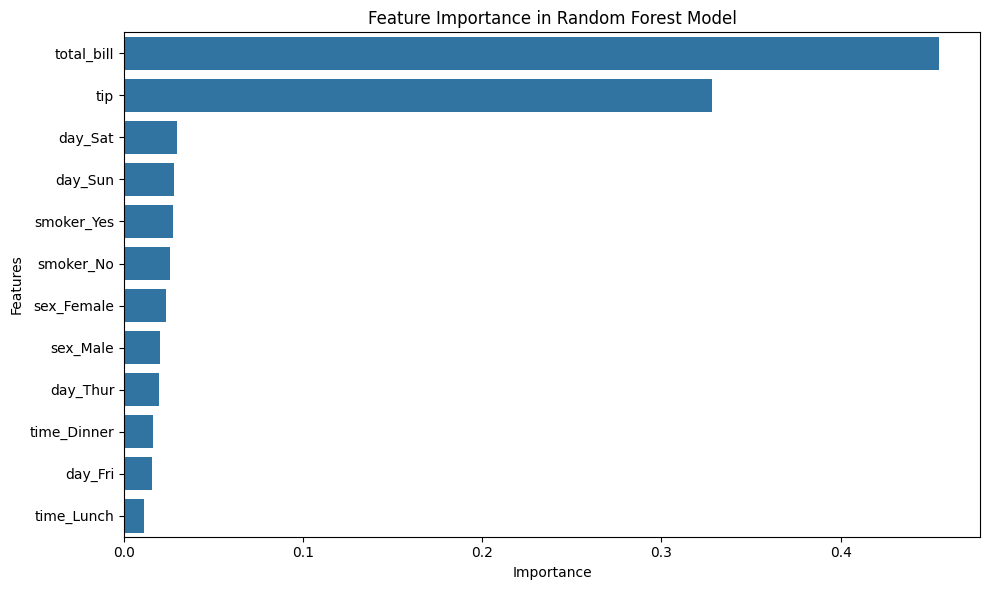


Feature Importance:
        feature  importance
0    total_bill    0.455073
1           tip    0.328133
7       day_Sat    0.029556
8       day_Sun    0.028135
5    smoker_Yes    0.027461
4     smoker_No    0.025747
2    sex_Female    0.023254
3      sex_Male    0.020157
9      day_Thur    0.019522
10  time_Dinner    0.016372
6       day_Fri    0.015383
11   time_Lunch    0.011205

새로운 데이터 예측:
입력 데이터:
   total_bill  tip   sex smoker  day    time
0        20.0  4.0  Male     No  Sun  Dinner

예측된 size: 2


In [46]:
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd 
import matplotlib.pyplot as plt

# 분류모델 만들기
tips = sns.load_dataset("tips")
tips.head()

# size 범주를 예측하는 모델을 만듭니다. 
# 가이드
# 문자열 데이터가 많음 ==> 인코딩 변환
# 수치 데이터는 ==> 표준화 
# 훈련 데이터 / 테스트 데이터 분리
tips['size'].unique() # 다중분류
tips['size'].value_counts() # 다중분류

# 특성 정의
numeric_features = ['total_bill', 'tip']
categorical_features = ['sex', 'smoker', 'day', 'time']

X = tips[numeric_features + categorical_features]
y = tips['size']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 데이터 전처리
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# 범주형 데이터 One-Hot 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# 특성 결합
X_train_processed = np.hstack([X_train_numeric, X_train_categorical])
X_test_processed = np.hstack([X_test_numeric, X_test_categorical])

# One-Hot 인코딩된 특성 이름 생성
feature_names = numeric_features.copy()
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i]
    feature_names.extend([f"{feature}_{cat}" for cat in categories])

# RandomForest 모델 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

# 예측 및 평가
y_pred = rf.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 특성 중요도 계산 및 시각화
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# 새로운 데이터 예측
print("\n새로운 데이터 예측:")
new_data = pd.DataFrame({
    'total_bill': [20.0],
    'tip': [4.0],
    'sex': ['Male'],
    'smoker': ['No'],
    'day': ['Sun'],
    'time': ['Dinner']
})

# 새로운 데이터 전처리
new_numeric = scaler.transform(new_data[numeric_features])
new_categorical = encoder.transform(new_data[categorical_features])
new_processed = np.hstack([new_numeric, new_categorical])

# 예측 수행
prediction = rf.predict(new_processed)
print("입력 데이터:")
print(new_data)
print("\n예측된 size:", prediction[0])

# LogisticRegression

Accuracy: 0.633

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80        30
           3       0.00      0.00      0.00         8
           4       0.25      0.14      0.18         7
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.63        49
   macro avg       0.15      0.19      0.16        49
weighted avg       0.44      0.63      0.52        49


Coefficients for each class:
   total_bill       tip  sex_Female  sex_Male  smoker_No  smoker_Yes  \
1   -1.328893 -0.954573    0.071984 -0.077397  -0.188960    0.183547   
2   -0.760478 -0.375252   -0.059626  0.046378  -0.379854    0.366606   
3    0.278639  0.089163   -0.020631  0.031848   0.106119   -0.094902   
4    0.809059  0.269870   -0.285920  0.302792   0.287725   -0.270853   
5    0.440438  0.149198   -

C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\lgu6p_ml_dl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\Desktop\l

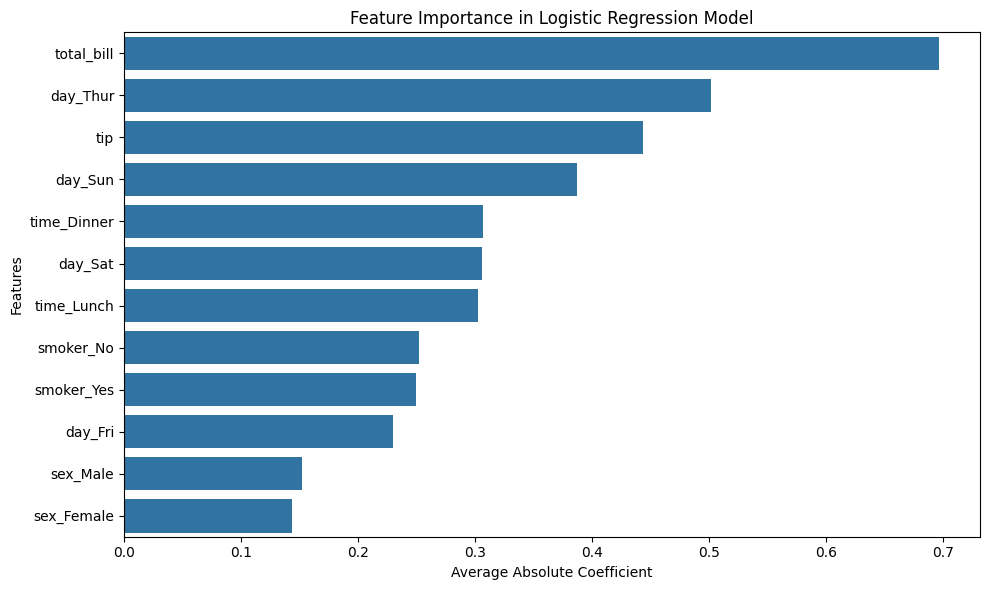


Feature Importance (Average Absolute Coefficient):
                 feature  importance
total_bill    total_bill    0.696457
day_Thur        day_Thur    0.501647
tip                  tip    0.443275
day_Sun          day_Sun    0.387309
time_Dinner  time_Dinner    0.306765
day_Sat          day_Sat    0.305918
time_Lunch    time_Lunch    0.302160
smoker_No      smoker_No    0.252129
smoker_Yes    smoker_Yes    0.249306
day_Fri          day_Fri    0.229696
sex_Male        sex_Male    0.152226
sex_Female    sex_Female    0.143882

새로운 데이터 예측:
입력 데이터:
   total_bill  tip   sex smoker  day    time
0        20.0  4.0  Male     No  Sun  Dinner

예측된 size: 2


In [47]:
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd 
import matplotlib.pyplot as plt

# 분류모델 만들기
tips = sns.load_dataset("tips")
tips.head()

# size 범주를 예측하는 모델을 만듭니다. 
# 가이드
# 문자열 데이터가 많음 ==> 인코딩 변환
# 수치 데이터는 ==> 표준화 
# 훈련 데이터 / 테스트 데이터 분리
tips['size'].unique() # 다중분류
tips['size'].value_counts() # 다중분류

# 특성 정의
numeric_features = ['total_bill', 'tip']
categorical_features = ['sex', 'smoker', 'day', 'time']

X = tips[numeric_features + categorical_features]
y = tips['size']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 데이터 전처리
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# 범주형 데이터 One-Hot 인코딩
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# 특성 결합
X_train_processed = np.hstack([X_train_numeric, X_train_categorical])
X_test_processed = np.hstack([X_test_numeric, X_test_categorical])

# One-Hot 인코딩된 특성 이름 생성
feature_names = numeric_features.copy()
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i]
    feature_names.extend([f"{feature}_{cat}" for cat in categories])

# 로지스틱 회귀 모델 학습
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logreg.fit(X_train_processed, y_train)

# 예측 및 평가
y_pred = logreg.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 계수 분석 및 시각화
# 각 클래스별 계수를 데이터프레임으로 변환
coef_df = pd.DataFrame(logreg.coef_, columns=feature_names, index=logreg.classes_)
print("\nCoefficients for each class:")
print(coef_df)

# 각 특성의 평균 절대 계수값 계산
mean_abs_coef = np.abs(coef_df).mean()
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_coef
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Average Absolute Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nFeature Importance (Average Absolute Coefficient):")
print(feature_importance)

# 새로운 데이터 예측
print("\n새로운 데이터 예측:")
new_data = pd.DataFrame({
    'total_bill': [20.0],
    'tip': [4.0],
    'sex': ['Male'],
    'smoker': ['No'],
    'day': ['Sun'],
    'time': ['Dinner']
})

# 새로운 데이터 전처리
new_numeric = scaler.transform(new_data[numeric_features])
new_categorical = encoder.transform(new_data[categorical_features])
new_processed = np.hstack([new_numeric, new_categorical])

# 예측 수행
prediction = logreg.predict(new_processed)
print("입력 데이터:")
print(new_data)
print("\n예측된 size:", prediction[0])